-----------
Initializing structure...
time for choose_chunkdivision = 0.000117064 s
Working in 2D dimensions.
Computational cell is 16 x 8 x 0 with resolution 10
     block, center = (0,0,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 0.0199981 s
-----------
run 0 finished at t = 200.0 (4000 timesteps)


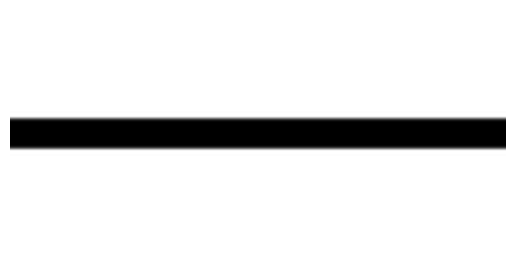

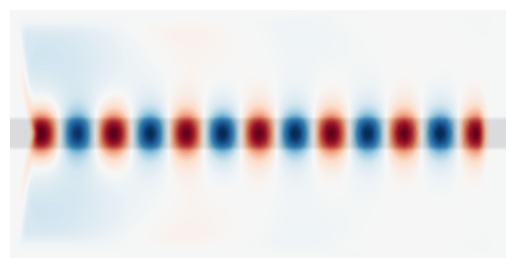

In [1]:
# From the Meep tutorial: plotting permittivity and fields of a straight waveguide
import meep as mp

cell = mp.Vector3(16, 8, 0)

geometry = [
    mp.Block(
        mp.Vector3(mp.inf, 1, mp.inf),
        center=mp.Vector3(),
        material=mp.Medium(epsilon=12),
    )
]

sources = [
    mp.Source(
        mp.ContinuousSource(frequency=0.15), component=mp.Ez, center=mp.Vector3(-7, 0)
    )
]

pml_layers = [mp.PML(1.0)]

resolution = 10

sim = mp.Simulation(
    cell_size=cell,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    resolution=resolution,
)

sim.run(until=200)

import matplotlib.pyplot as plt
import numpy as np

eps_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Dielectric)
plt.figure()
plt.imshow(eps_data.transpose(), interpolation="spline36", cmap="binary")
plt.axis("off")
plt.show()

ez_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Ez)
plt.figure()
plt.imshow(eps_data.transpose(), interpolation="spline36", cmap="binary")
plt.imshow(ez_data.transpose(), interpolation="spline36", cmap="RdBu", alpha=0.9)
plt.axis("off")
plt.show()